## About The Dataset :


age: Age of the patient

sex: Sex of the patient

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable

### Importing libraries + setting up charts 

In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading The Dataset



In [65]:
df=pd.read_csv("heart.csv")
df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
new_columns

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'rest_ecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [11]:
df.columns = new_columns


In [12]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Checking the shape of DataFrame



In [13]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


## Checking For datatypes of the attributes



In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### All attributes are of type 'int' except 'oldpeak'



## Checking for null values



In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### No null values found


## Checking for duplicate rows



In [6]:
df[df.duplicated()]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


## Removing the duplicates



In [10]:
df.drop_duplicates(keep='first',inplace=True)


In [7]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [18]:
df.head()


,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df["cp"].value_counts()


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [20]:
df["cp"].value_counts().sum()


303

In [21]:
df["cp"].value_counts().count()


4

In [22]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


## Checking statistical data



In [23]:
df.head()


,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]
df[numeric_var].describe()


,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [25]:
df[categoric_var].describe()


,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.148515,0.528053,0.326733,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,0.356198,0.525860,0.469794,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


 ## Computing the correlation matrix



In [11]:
df.corr()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# Data Visualization


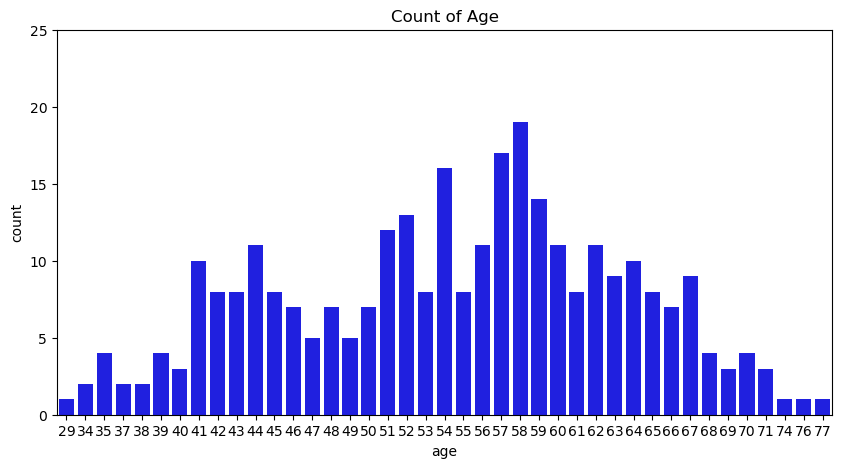

In [12]:
##Count of Age
plt.figure(figsize=(10,5))
sns.countplot(x='age',data=df,color='b');
plt.ylim(0,25)
plt.title("Count of Age");

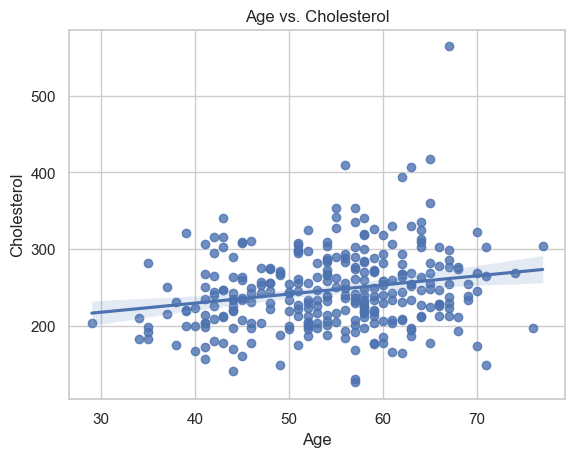

In [30]:
# Set the style for the plot to 'whitegrid' using seaborn
sns.set(style='whitegrid')

# Create a scatter plot with a regression line using regplot
# The data used is from the DataFrame 'df', where 'age' is plotted on the x-axis and 'chol' on the y-axis
sns.regplot(data=df, x='age', y='chol')

# Set the label for the x-axis to 'Age'
plt.xlabel('Age')

# Set the label for the y-axis to 'Cholesterol'
plt.ylabel('Cholesterol')

# Set the title for the plot to 'Age vs. Cholesterol'
plt.title('Age vs. Cholesterol')

# Display the plot
plt.show()


 ## Age vs Cholesterol data.
1) The peak level of cholesterol within the median lands at approximately 350.

2) Majority of people of ages 30-70 maintain their cholesterol levels at 250 level.

3) From the current data set, we can observe only one anomaly case of cholesterol above 500

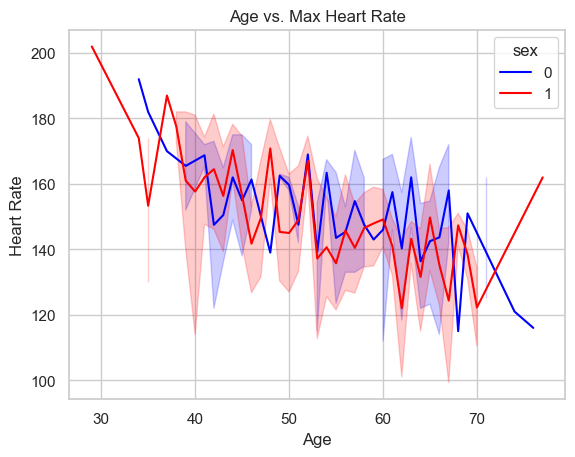

In [47]:
# Set the style for the plot to 'whitegrid' using seaborn
sns.set(style='whitegrid')

# Create a line plot with multiple lines based on the 'sex' variable using lineplot
# The data used is from the DataFrame 'df', where 'age' is plotted on the x-axis and 'thalachh' (maximum heart rate achieved) on the y-axis
# The 'hue' parameter is set to 'sex', which differentiates the lines by the 'sex' variable
# The 'palette' parameter is used to set the colors of the lines, where 'blue' corresponds to one sex and 'red' corresponds to the other
sns.lineplot(data=df, x='age', y='thalachh', hue='sex', palette=['blue', 'red'])

# Set the label for the x-axis to 'Age'
plt.xlabel('Age')

# Set the label for the y-axis to 'Heart Rate'
plt.ylabel('Heart Rate')

# Set the title for the plot to 'Age vs. Max Heart Rate'
plt.title('Age vs. Max Heart Rate')

# Display the plot
plt.show()


### Age vs max heart rate in males and females
1) Males have lower heart rates on average than females

2) Within the given age range, the drop of heart rate of females starts before 30 and after 30 for males

3) After the age of 70, we observe significant raise of heart rate in females and the opposite for males

## Life Expectancy


## Sex Feature(1 is male and 0 is female)



Number of people having sex as 1 are 96 and Number of people having sex as 0 are 206


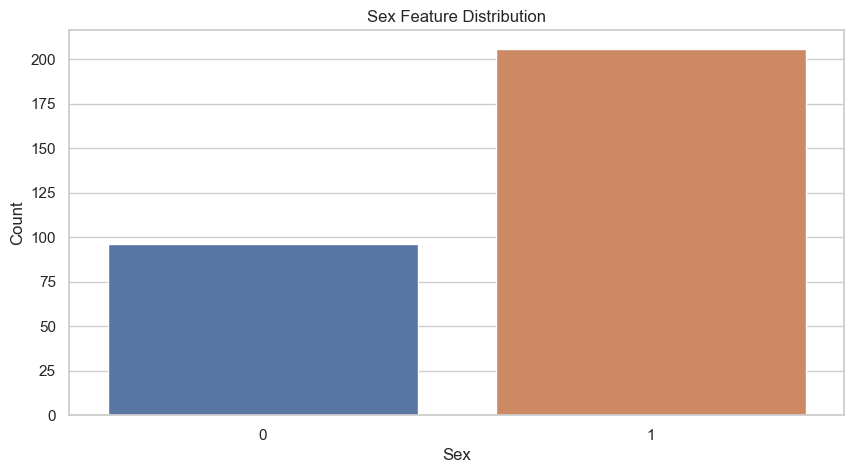

In [31]:
# Set the size of the figure (plot) to 10 units in width and 5 units in height
plt.figure(figsize=(10, 5))

# Create a count plot to visualize the distribution of the 'sex' feature in the DataFrame 'df'
# The count plot will show the number of occurrences for each value in the 'sex' column
sns.countplot(x="sex", data=df)

# Calculate and print the number of people with 'sex' equal to 1 and the number of people with 'sex' equal to 0
# 'x[0]' corresponds to the count of 'sex' equal to 1, and 'x[1]' corresponds to the count of 'sex' equal to 0
x = df['sex'].value_counts()
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')

# Set the title for the plot to 'Sex Feature Distribution'
plt.title('Sex Feature Distribution')

# Set the label for the x-axis to 'Sex'
plt.xlabel('Sex')

# Set the label for the y-axis to 'Count'
plt.ylabel('Count')

# Display the plot
plt.show()


#### People having gender as 0 are more than twice the people having gender as 1



<Axes: xlabel='output', ylabel='count'>

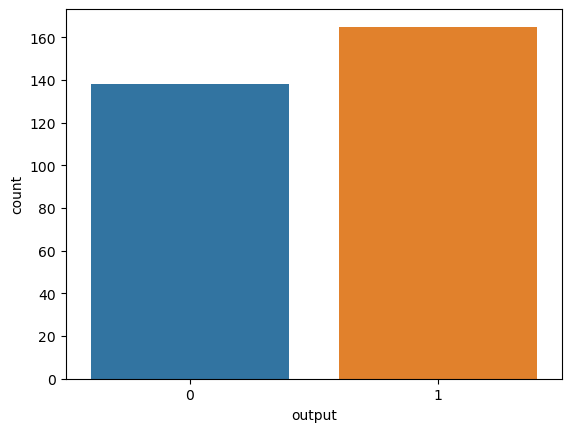

In [37]:
sns.countplot(data=df, x='output')



## CP Feature

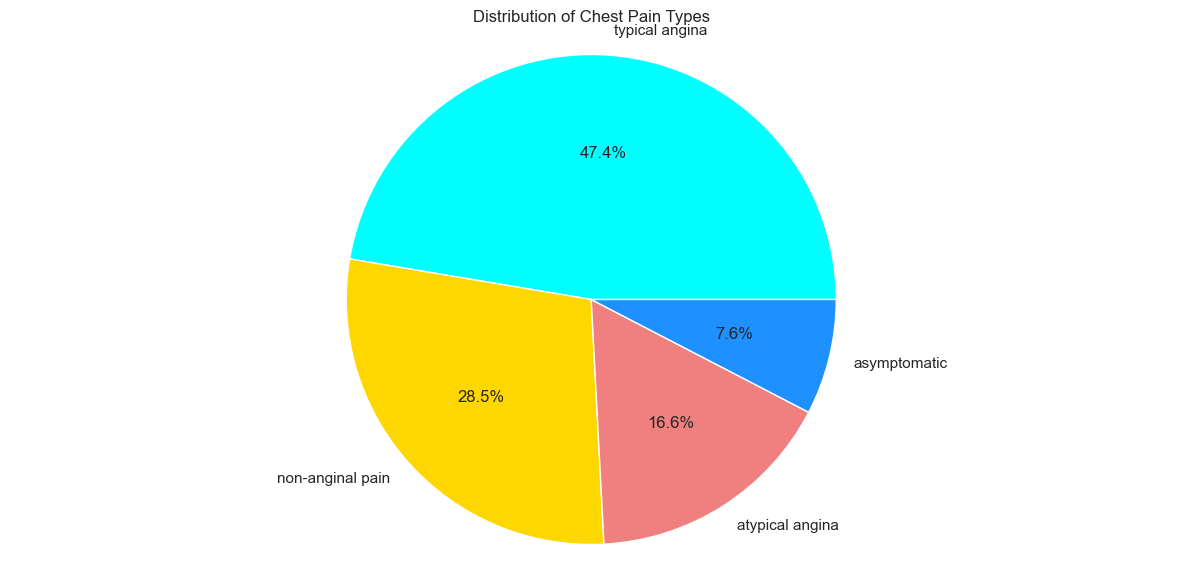

In [33]:
# Calculate the counts of different types of chest pain (cp) in the DataFrame 'df'
cp_counts = df.cp.value_counts()

# Define a list of colors to be used for the pie chart segments
colors = ['aqua', 'gold', 'lightcoral', 'dodgerblue']

# Create a new figure (plot) with a size of 15 units in width and 7 units in height
plt.figure(figsize=(15, 7))

# Create a pie chart to visualize the distribution of different chest pain types
# The 'cp_counts' contains the counts for each chest pain type, and the labels represent the types themselves
# The 'autopct' parameter specifies the format for displaying the percentage values on the pie chart
# The 'colors' parameter sets the colors of the pie chart segments based on the 'colors' list defined earlier
plt.pie(cp_counts, labels=['typical angina', 'non-anginal pain', 'atypical angina', 'asymptomatic'], autopct='%1.1f%%', colors=colors)

# Set the title for the pie chart as "Distribution of Chest Pain Types"
plt.title("Distribution of Chest Pain Types")

# Ensure the pie chart is displayed in a circular shape (equal aspect ratio)
plt.axis('equal')

# Display the pie chart
plt.show()


### Some Info About Chest Pain
##### Chest pain is sign of herat attack.
##### Symptoms of Chest pain:
##### 1]jaw pain or back/arm pain
###### 2]dizziness
##### 3]shortness of breath
##### 4]abdominal pain
##### There are numerous other symptoms, but the ones listed above are the most common.

### trtbps Feature

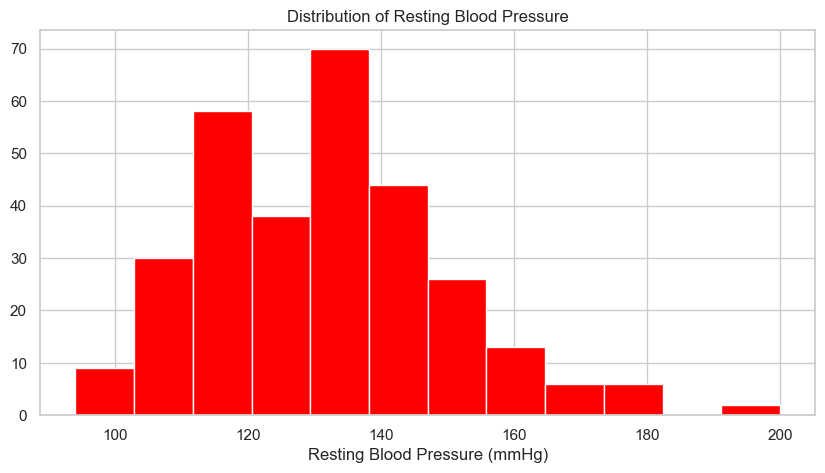

In [34]:
# Create a new figure (plot) with a size of 10 units in width and 5 units in height
plt.figure(figsize=(10, 5))

# Create a histogram to visualize the distribution of the 'trtbps' column in the DataFrame 'df'
# The 'trtbps' column represents resting blood pressure, and the 'bins' parameter sets the number of intervals (bins) for the histogram
# The 'color' parameter sets the color of the histogram bars to red
plt.hist(df['trtbps'], bins=12, color='red')

# Set the title for the histogram as "Distribution of Resting Blood Pressure"
plt.title("Distribution of Resting Blood Pressure")

# Set the label for the x-axis as "Resting Blood Pressure (mmHg)"
plt.xlabel("Resting Blood Pressure (mmHg)")

# Display the plot
plt.show()


### Cholesterol Feature

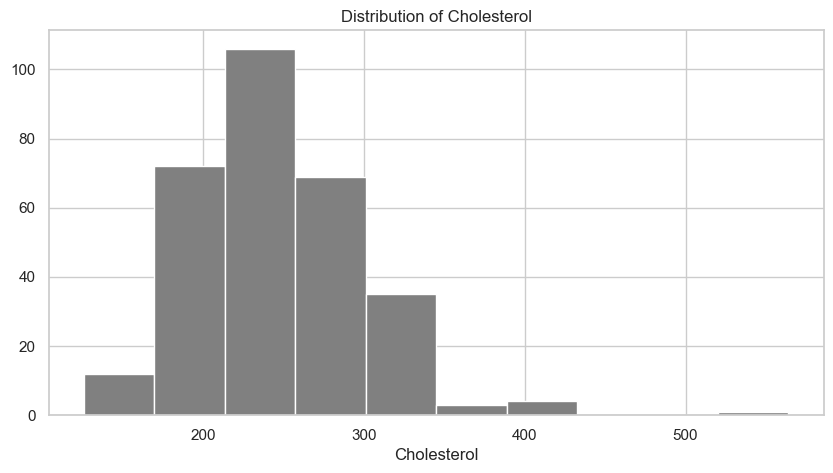

In [35]:
# Create a new figure (plot) with a size of 10 units in width and 5 units in height
plt.figure(figsize=(10, 5))

# Create a histogram to visualize the distribution of the 'chol' column in the DataFrame 'df'
# The 'chol' column represents cholesterol levels, and the 'bins' parameter sets the number of intervals (bins) for the histogram
# The 'color' parameter sets the color of the histogram bars to grey
plt.hist(df['chol'], bins=10, color='grey')

# Set the title for the histogram as "Distribution of Cholesterol"
plt.title("Distribution of Cholesterol")

# Set the label for the x-axis as "Cholesterol"
plt.xlabel("Cholesterol")

# Display the plot
plt.show()


### When human have too much bad Cholesterol in body which can cause heart attack or heart disease.
##### What causes high Cholesterol?
##### 1]Overweight
##### 2]Smoking
##### 3]Following trendy diet.
##### 4]Sometimes genetic risk.


## thalach

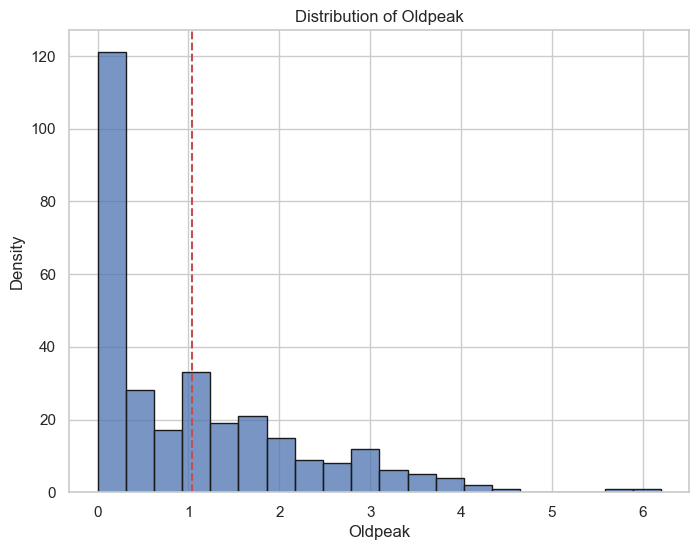

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot to 'whitegrid' using seaborn
sns.set(style='whitegrid')

# Create a subplot layout with one row and one column, and set the size of the subplot to 8 units in width and 6 units in height
x, y = plt.subplots(figsize=(8, 6))

# Create a histogram (axes-level) to visualize the distribution of the 'oldpeak' column in the DataFrame 'df'
# The 'linewidth' parameter sets the width of the histogram bars, and the 'edgecolor' parameter sets the color of the edges of the bars
# The 'bins' parameter sets the number of intervals (bins) to be used in the histogram
sns.histplot(data=df, x="oldpeak", linewidth=1, edgecolor="k", bins=20, ax=y)

# Add a vertical line at the mean value of the 'oldpeak' column using 'axvline' function
# The line is drawn in red (color="r") and represented by a dashed line (ls="--")
y.axvline(df["oldpeak"].mean(), color="r", ls="--")

# Set the title of the plot to "Distribution of Oldpeak"
plt.title("Distribution of Oldpeak")

# Set the label for the x-axis to "Oldpeak"
plt.xlabel("Oldpeak")

# Set the label for the y-axis to "Density"
plt.ylabel("Density")

# Display the plot
plt.show()


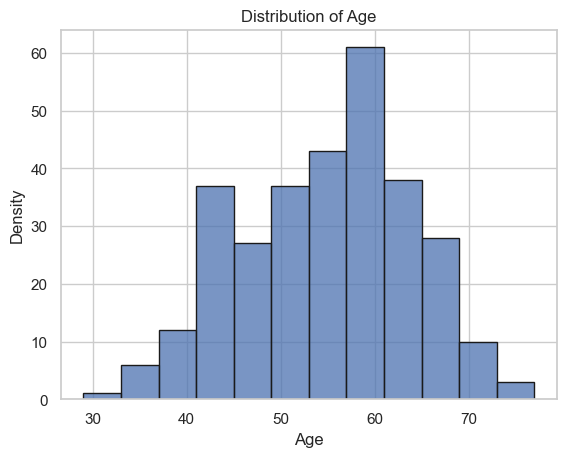

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot to 'whitegrid' using seaborn
sns.set(style='whitegrid')

# Create a histogram (axes-level) to visualize the distribution of the 'age' column in the DataFrame 'df'
# The 'linewidth' parameter sets the width of the histogram bars, and the 'edgecolor' parameter sets the color of the edges of the bars
sns.histplot(data=df, x="age", linewidth=1, edgecolor="k")

# Set the title of the plot to "Distribution of Age"
plt.title("Distribution of Age")

# Set the label for the x-axis to "Age"
plt.xlabel("Age")

# Set the label for the y-axis to "Density"
plt.ylabel("Density")

# Display the plot
plt.show()


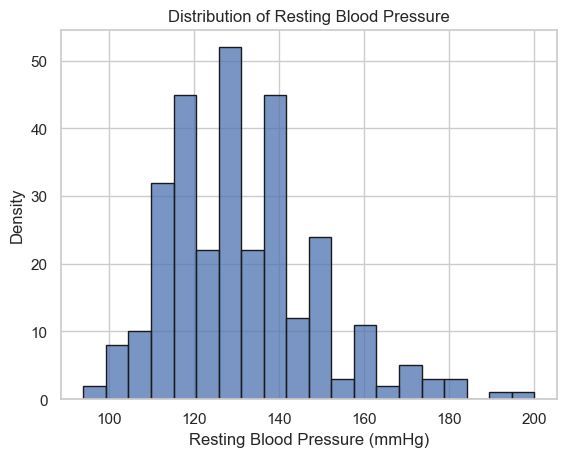

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot to 'whitegrid' using seaborn
sns.set(style='whitegrid')

# Create a histogram (axes-level) to visualize the distribution of the 'trtbps' column in the DataFrame 'df'
# The 'linewidth' parameter sets the width of the histogram bars, and the 'edgecolor' parameter sets the color of the edges of the bars
# The 'bins' parameter sets the number of intervals (bins) to be used in the histogram
sns.histplot(data=df, x="trtbps", linewidth=1, edgecolor="k", bins=20)

# Set the title of the plot to "Distribution of Resting Blood Pressure"
plt.title("Distribution of Resting Blood Pressure")

# Set the label for the x-axis to "Resting Blood Pressure (mmHg)"
plt.xlabel("Resting Blood Pressure (mmHg)")

# Set the label for the y-axis to "Density"
plt.ylabel("Density")

# Display the plot
plt.show()


#### Numerical Variables(Analysis with Distplot)

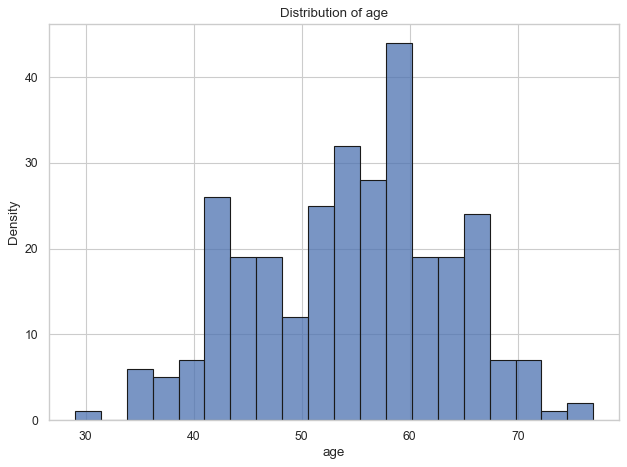

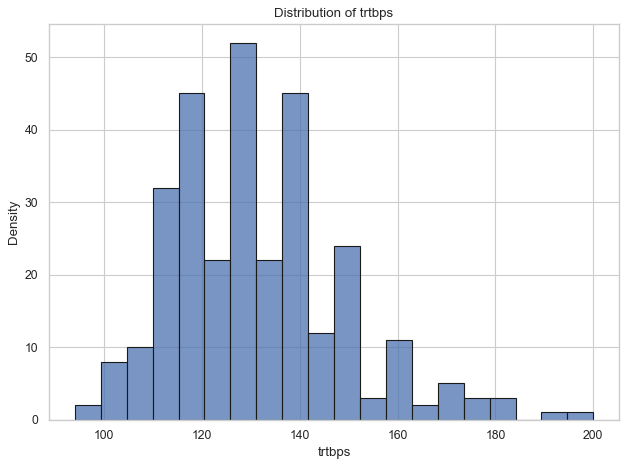

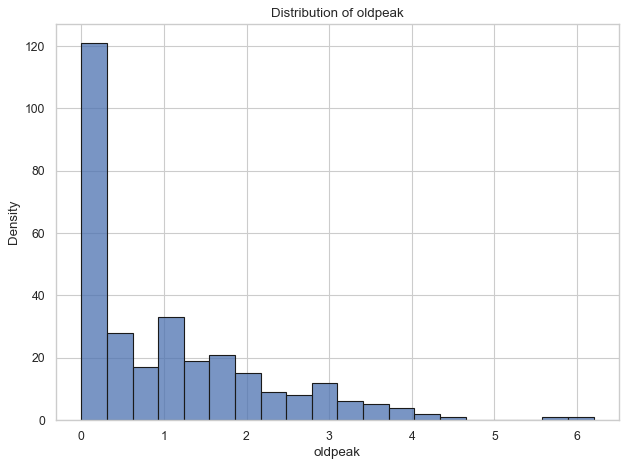

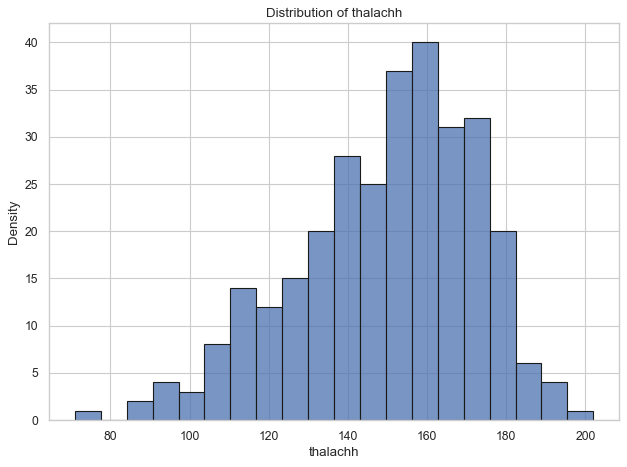

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot to 'whitegrid' using seaborn
sns.set(style='whitegrid')

# Define the list of numeric columns you want to plot
numeric_var = ['age', 'trtbps', 'oldpeak', 'thalachh']  # Add other numeric columns as needed

# Loop through each numeric variable in the 'numeric_var' list
for i in numeric_var:
    # Create a new figure (plot) with a size of 8 units in width and 6 units in height, and set the resolution (dpi) to 80
    plt.figure(figsize=(8, 6), dpi=80)
    
    # Create a histogram (axes-level) to visualize the distribution of the current numeric variable in the DataFrame 'df'
    # The 'linewidth' parameter sets the width of the histogram bars, and the 'edgecolor' parameter sets the color of the edges of the bars
    sns.histplot(data=df, x=i, linewidth=1, edgecolor="k", bins=20)
    
    # Set the title of the plot to the name of the current numeric variable
    plt.title(f"Distribution of {i}")
    
    # Set the label for the x-axis to the name of the current numeric variable
    plt.xlabel(i)
    
    # Set the label for the y-axis to "Density"
    plt.ylabel("Density")
    
    # Adjust the layout to ensure that all elements of the plot fit within the figure area
    plt.tight_layout()
    
    # Display the plot for the current numeric variable
    plt.show()


In [75]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]
list(zip(numeric_var, numeric_axis_name))


[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('oldpeak', 'Cholesterol'),
 ('thalachh', 'Maximum Heart Rate Achieved')]

#### Age Variable
The vast majority of patients are between 50 and 60.
There is a remarkable place on the chart. There is a decrease in patients between the ages of 47-and 50.
It looks like there are no outliers in the variable.
#### Trtbps Variable
The resting blood pressure of most patients is generally between 110 and 140.
Values after 180 can be considered as outliers.
There is hefty patient traffic between 115-120, 125-130, and 155-160 values.
#### Cholesterol Variable
Cholesterol value in most patients is between 200-and 280.
Values after 380 can be considered as outliers.
#### Thalach Variable
The maximum heart rate achieved in most patients is between 145-and 170.
In particular, The values before 80 can be considered outliers.
#### Oldpeak Variable
Values of the vast majority of patients in the variable range from 0 to 1.5.
Especially values after 2.5 can be considered as outliers.

#### Categorical Variables(Analysis with Pie Chart)


In [87]:
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]


In [91]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [92]:
list(zip(categoric_var, categoric_axis_name))


[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [89]:
df["cp"].value_counts()


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [70]:
list(df["cp"].value_counts())


[143, 87, 50, 23]

In [71]:
list(df["cp"].value_counts().index)


[0, 2, 1, 3]

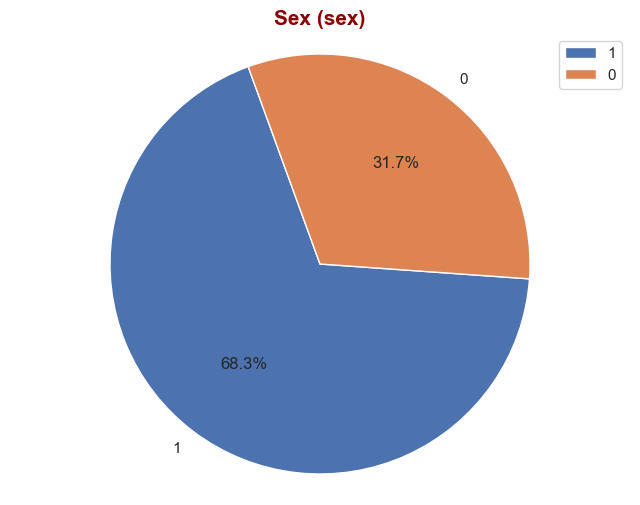

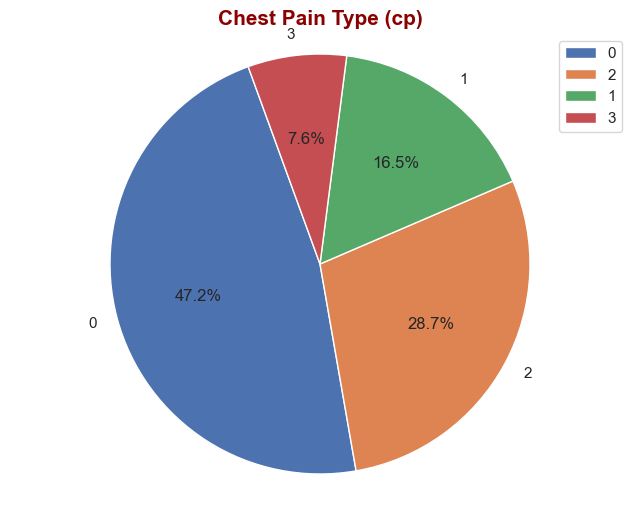

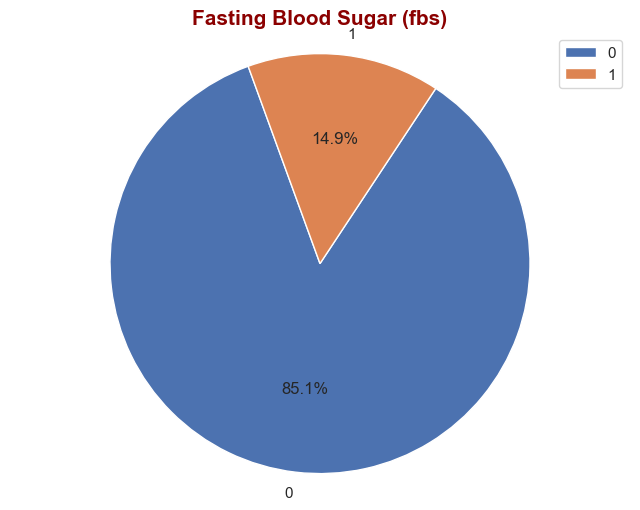

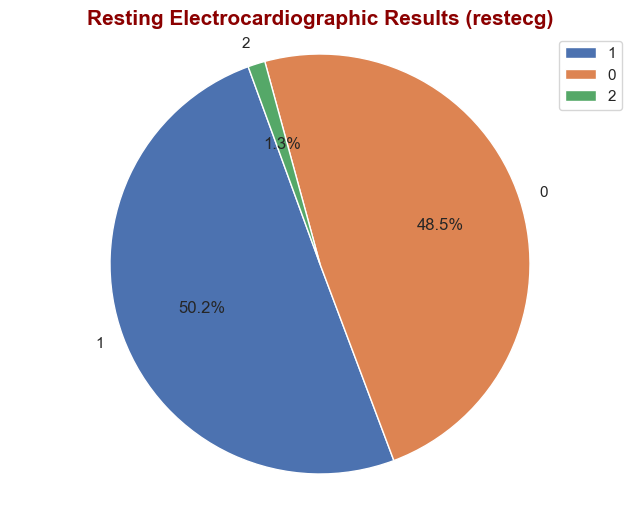

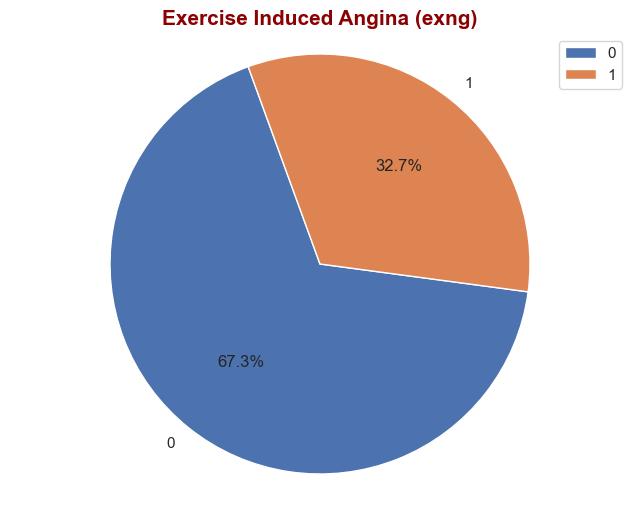

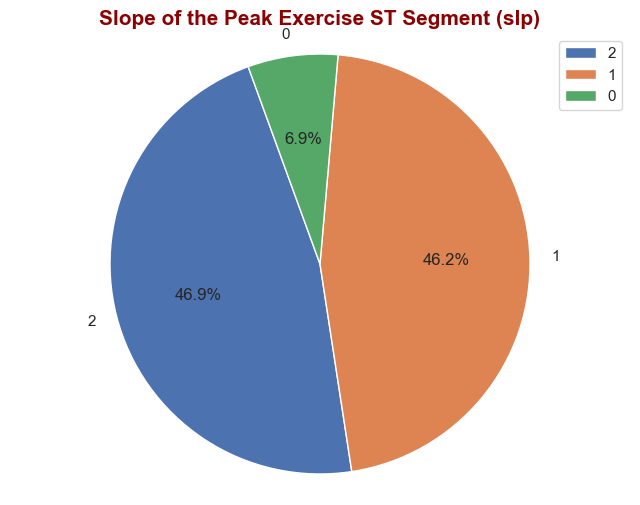

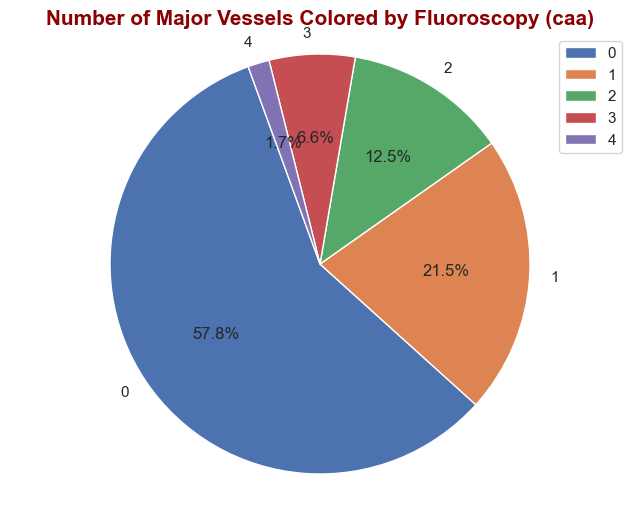

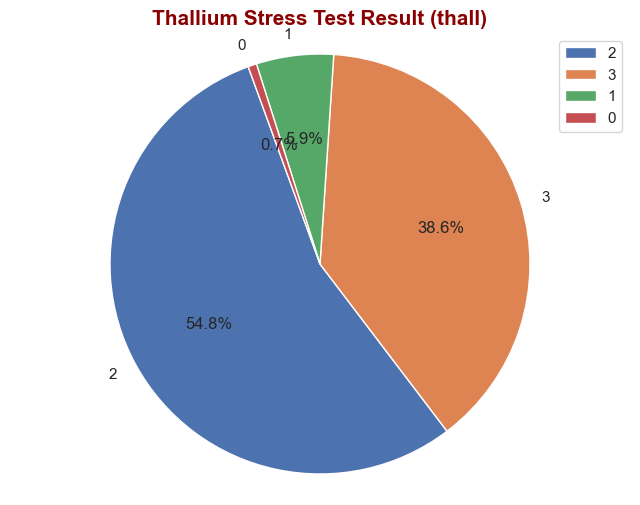

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot to 'whitegrid' using seaborn
sns.set(style='whitegrid')

# Define the list of categorical columns you want to plot
categoric_var = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']  # Add other categorical columns as needed

# Define the list of axis names for the categorical variables (to be used in plot titles)
categoric_axis_name = ['Sex', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting Electrocardiographic Results',
                       'Exercise Induced Angina', 'Slope of the Peak Exercise ST Segment',
                       'Number of Major Vessels Colored by Fluoroscopy', 'Thallium Stress Test Result']

# Loop through each categorical variable in the 'categoric_var' list
for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels=observation_values, autopct='%1.1f%%', startangle=110, labeldistance=1.1)
    ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((z + " (" + i + ")"), fontdict=title_font)  # Naming Pie Chart Titles
    plt.legend()
    plt.show()


### Sex Variable
68.3% of the patients are male, 31.7% are female.
So, the number of male patients is more than twice that of female patients.
### Cp Variable
Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina
Half of the patients are asymptomatic; they have pain without symptoms.
If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2.
In other words, atypical angina is in 29% of the patients.
This observation value shows patients with shortness of breath or non-classical pain.
The other two observation values are less than the others.
16.5% of patients have a value of 1. In other words, typical angina is seen. Typical angina is the classic exertion pain that comes during any physical activity.
The other 8% has the value of non-anginal pain, which is three types of angina.
Non-anginal pain is the term used to describe chest pain that is not caused by heart disease or a heart attack.
### Fbs Variable
The vast majority of patients have an observation value of 1. In other words, 85%.
The fasting blood sugar of these patients is more than 120 mg/dl.
The remaining 15 percent have a less than 120 mg/dl fasting blood glucose level.
Rest_ecg Variable
The thing that draws attention to the image of this variable is that the number of patients with two observation values is negligible.
It has a value of 1.3 percent. When we look at all of these patients, it is not a very important number.
This value represents the ST and T wavelengths of the patients.
Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal.
The size of those with 1, that is, the orange part on the graph is 50.2%
This means that the resting electrocardiographic results of these patients are normal.
The percentage of patients with a value of 0 is 48.5%.
That is, the patients' values of 48.5% are normal.
Exang Variable
We have said that this variable stands for exercise-induced angina.
Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart.
According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.
Slope Variable
The minimum observation value is 0 with 7 percent.
This is patients with a downward slope of the ST wavelength.
The other two observation values are almost equal to each other.
The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.
Ca variable
This variable is the number of great vessels colored by fluoroscopy.
In more than half of the patients, 57.8 percent, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent.
After 0 observation value, the other value with the most slices in the pie chart 1
The number of large vessels observed in 21.5% of the patients is 1
The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.
Thal Variable
The "Thal" variable is short for the "Thallium stress test."
The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.
There are three observation values in the description of this variable. However, the pie chart shows four values. Values 0, 1, 2 and 3.
According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.
In this context, according to the thallium stress test results, 54.8 percent of the patients have two observation values, so the test result appears to be expected.
36.8 percent has a value of 3, so we can say that this value is a reversible defect as an explanation.
5.9 percent of patients have a value of 1, so the test result for these patients is a fixed defect.
Target Variable
More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent have no heart attack risk.

## EDA(EXPLORATORY DATA ANALYSIS)
LETS CHECK THE DISTRIBUTION OF OUR DATA.




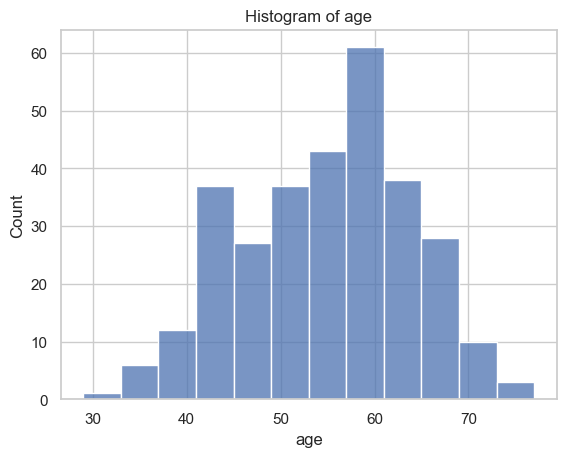

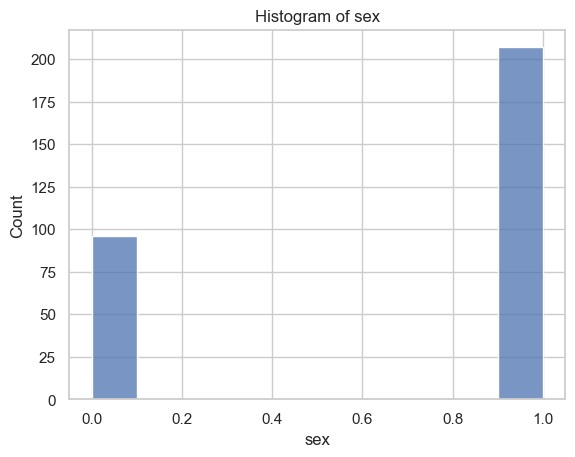

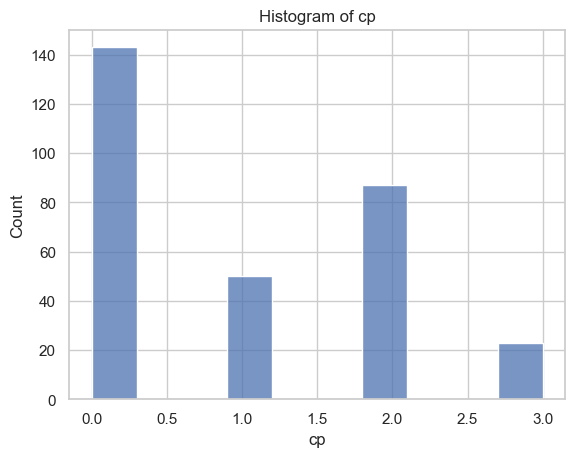

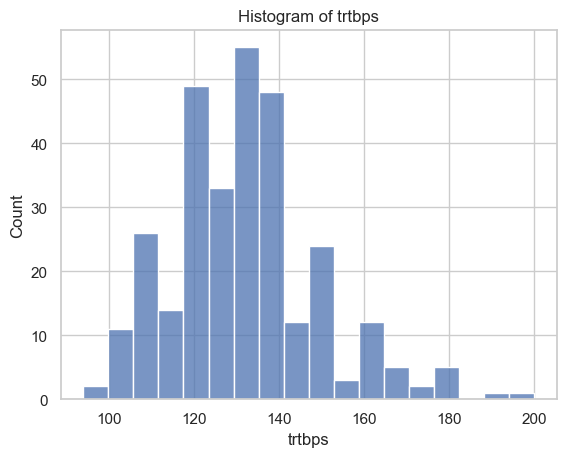

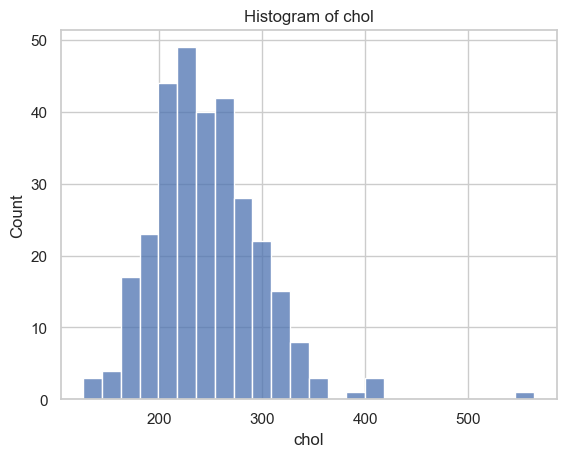

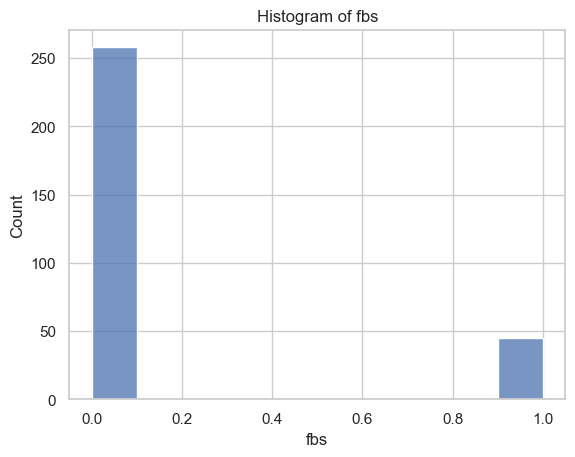

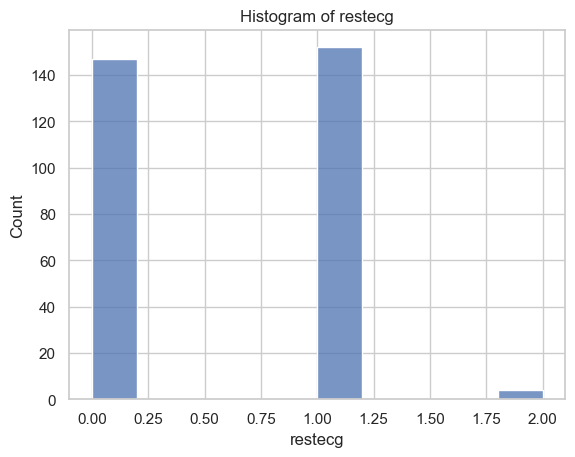

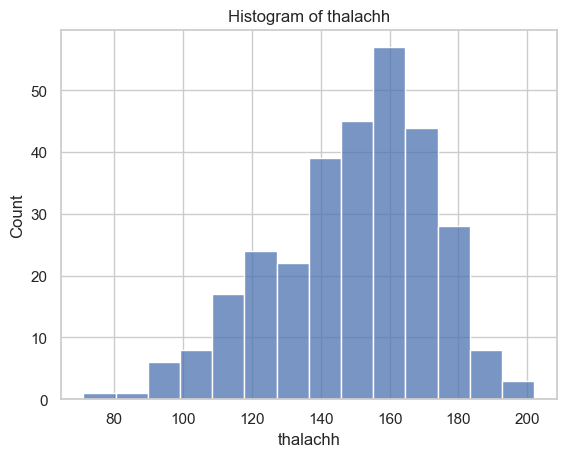

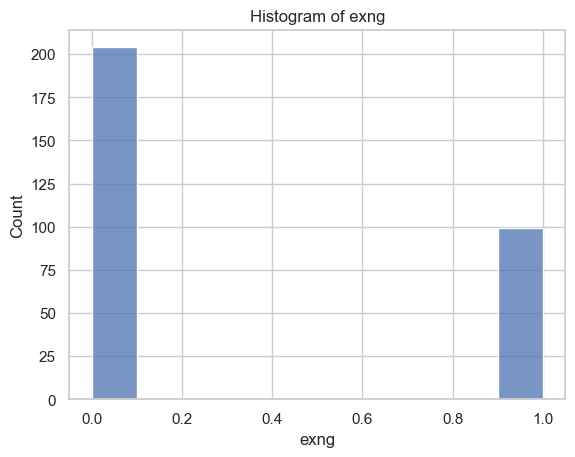

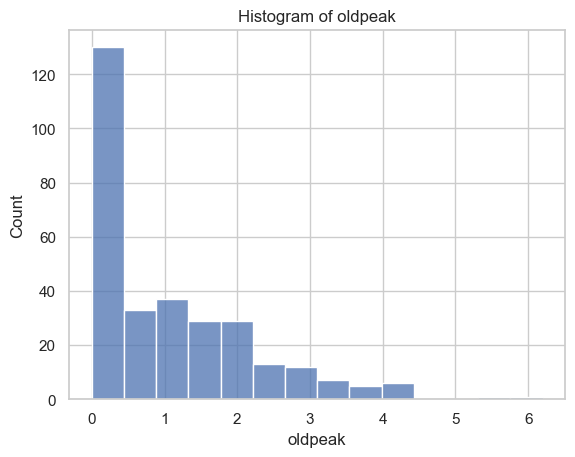

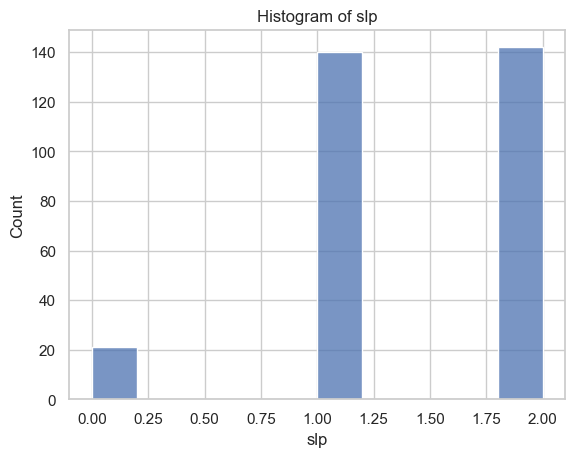

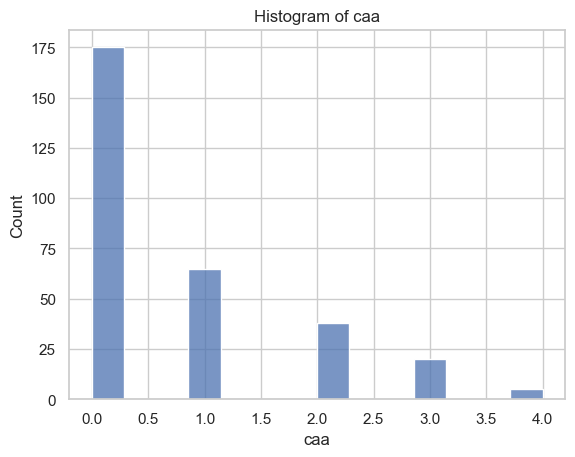

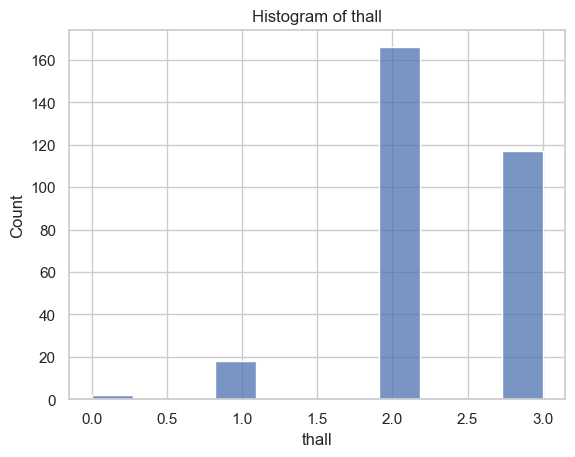

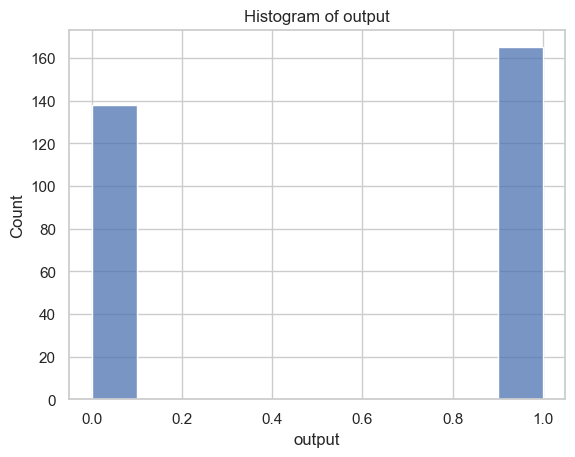

In [80]:
for column in df.columns:
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.show()
    

## Correlation


<Axes: >

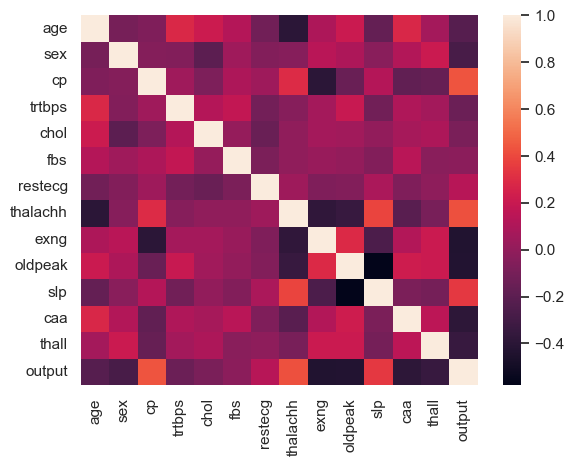

In [81]:
sns.heatmap(df.corr())


## Corelation Matrix with dummy variables

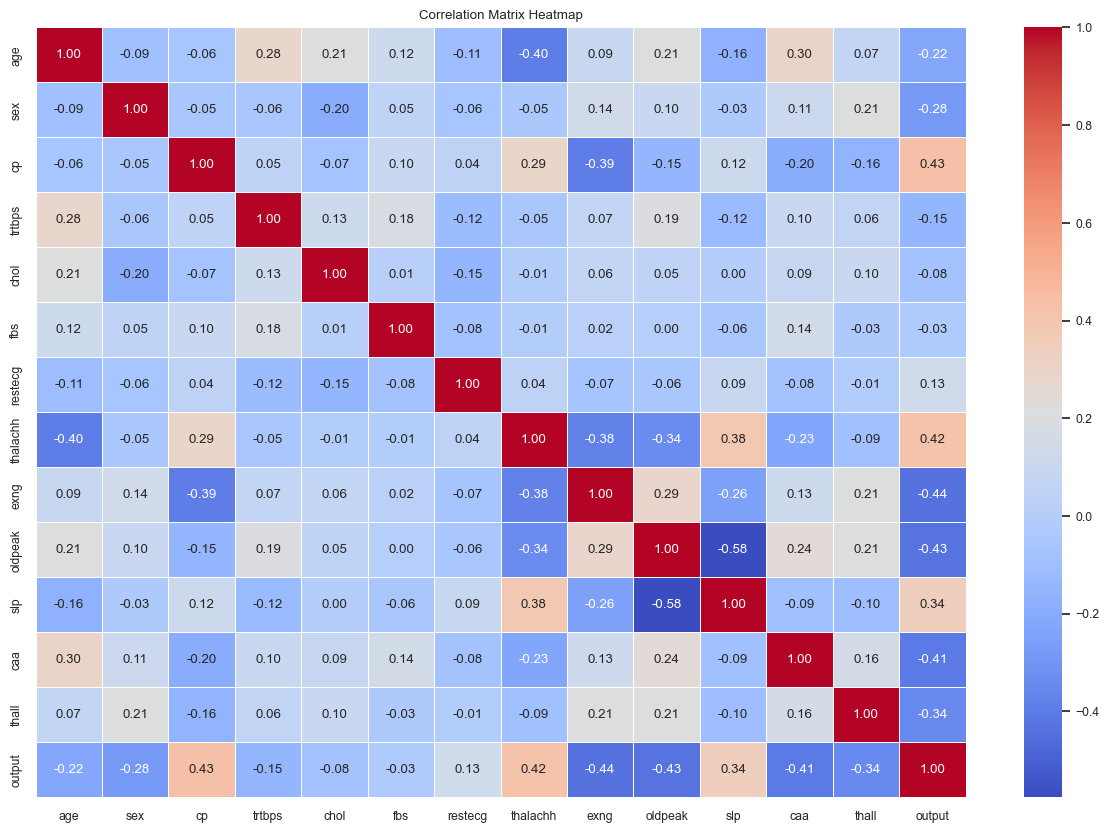

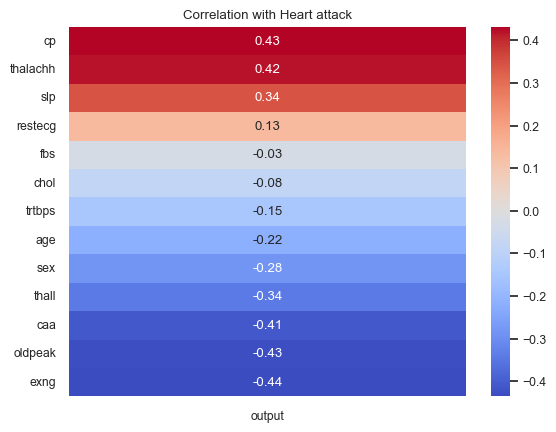

In [28]:
correlation_matrix =df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = df.corr()
target_corr = corr['output'].drop('output')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()

## Intepret the result

Our dataset comprises of various factors related to heart health and overall health indicators. In this analysis, we examine the relationship of these factors with the likelihood of heart disease, characterized by >50% diameter narrowing.

## 1 | Positive Correlations

1. Normal Thallium Stress Test Results (thall_normal, 0.526866): Individuals with a normal thallium stress test result showed the highest likelihood of heart disease. Thallium stress tests are generally used to identify areas of poor blood flow in the heart, which might indicate coronary artery disease. The positive correlation suggests that even with a "normal" result, there could be a mild form of disease that is likely progressing. 2. Maximum Heart Rate Achieved (thalachh, 0.421741): A high maximum heart rate achieved during testing is associated with a higher likelihood of heart disease. A high heart rate during exercise could reflect an underlying stress on the heart, which might indicate some form of cardiovascular disease.
3. Downsloping Peak Exercise ST Segment (slp_downsloping, 0.394066): The presence of a downsloping peak exercise ST segment in an ECG report is associated with a higher probability of heart disease. This feature might be indicative of ischemia, which is reduced blood flow to the heart.
4. Non-anginal Chest Pain (cp_non-anginal pain, 0.316742): Non-anginal chest pain also shows a significant positive correlation with heart disease. This type of chest pain is often mistaken for indigestion or muscle pain, possibly leading to delayed diagnosis and treatment.
5. Female Sex (sex_female, 0.280937): Females in this dataset are more likely to have heart disease compared to males. This could potentially reflect the different symptom presentation in women that often leads to delayed diagnosis and management of heart disease.


## 2 | Negative Correlations


1. Typical Angina (cp_typical angina, -0.516015): The strongest negative correlation is associated with typical angina pain. This could suggest that individuals who experience classic symptoms of heart disease, such as chest pain and discomfort, are more likely to seek medical attention early, thus reducing the progression to significant heart disease. 
2. Reversible Defect in Thallium Stress Test (thall_reversible defect, -0.486112): A reversible defect in the thallium stress test, usually indicating ischemia, has a negative correlation with heart disease. This might suggest that patients with such defects are treated successfully, reducing the chance of progressing to significant heart disease. 
3. Exercise-Induced Angina (exng, -0.436757): Exercise-induced angina is associated with a lower likelihood of heart disease. Similar to typical angina, individuals experiencing chest pain during exercise are more likely to seek early medical intervention, reducing the risk of advanced heart disease. 
4. ST Depression Induced by Exercise Relative to Rest (oldpeak, -0.430696): ST depression induced by exercise, a sign of possible heart stress, shows a negative correlation with heart disease. This could suggest effective treatment and management of patients with this symptom, decreasing the likelihood of severe heart disease.
5. Number of Major Vessels Colored by Fluoroscopy (caa, -0.391724): A higher number of vessels visible during fluoroscopy is associated with a lower risk of heart disease. This could reflect good blood flow to the heart, reducing the likelihood of significant heart disease.

Limitations and Further Study
While these bivariate correlations provide an insightful first step in understanding the data, they do not account for potential interactions and confounding effects between different variables. For example, age and sex might interact with other risk factors, altering the relationship with heart disease likelihood. Multivariate analyses would help to unpack these complex relationships further.

In the next phase of our study, we plan to employ machine learning models to predict heart disease likelihood based on these features. This will enable us to use a multivariate approach, considering all variables simultaneously.

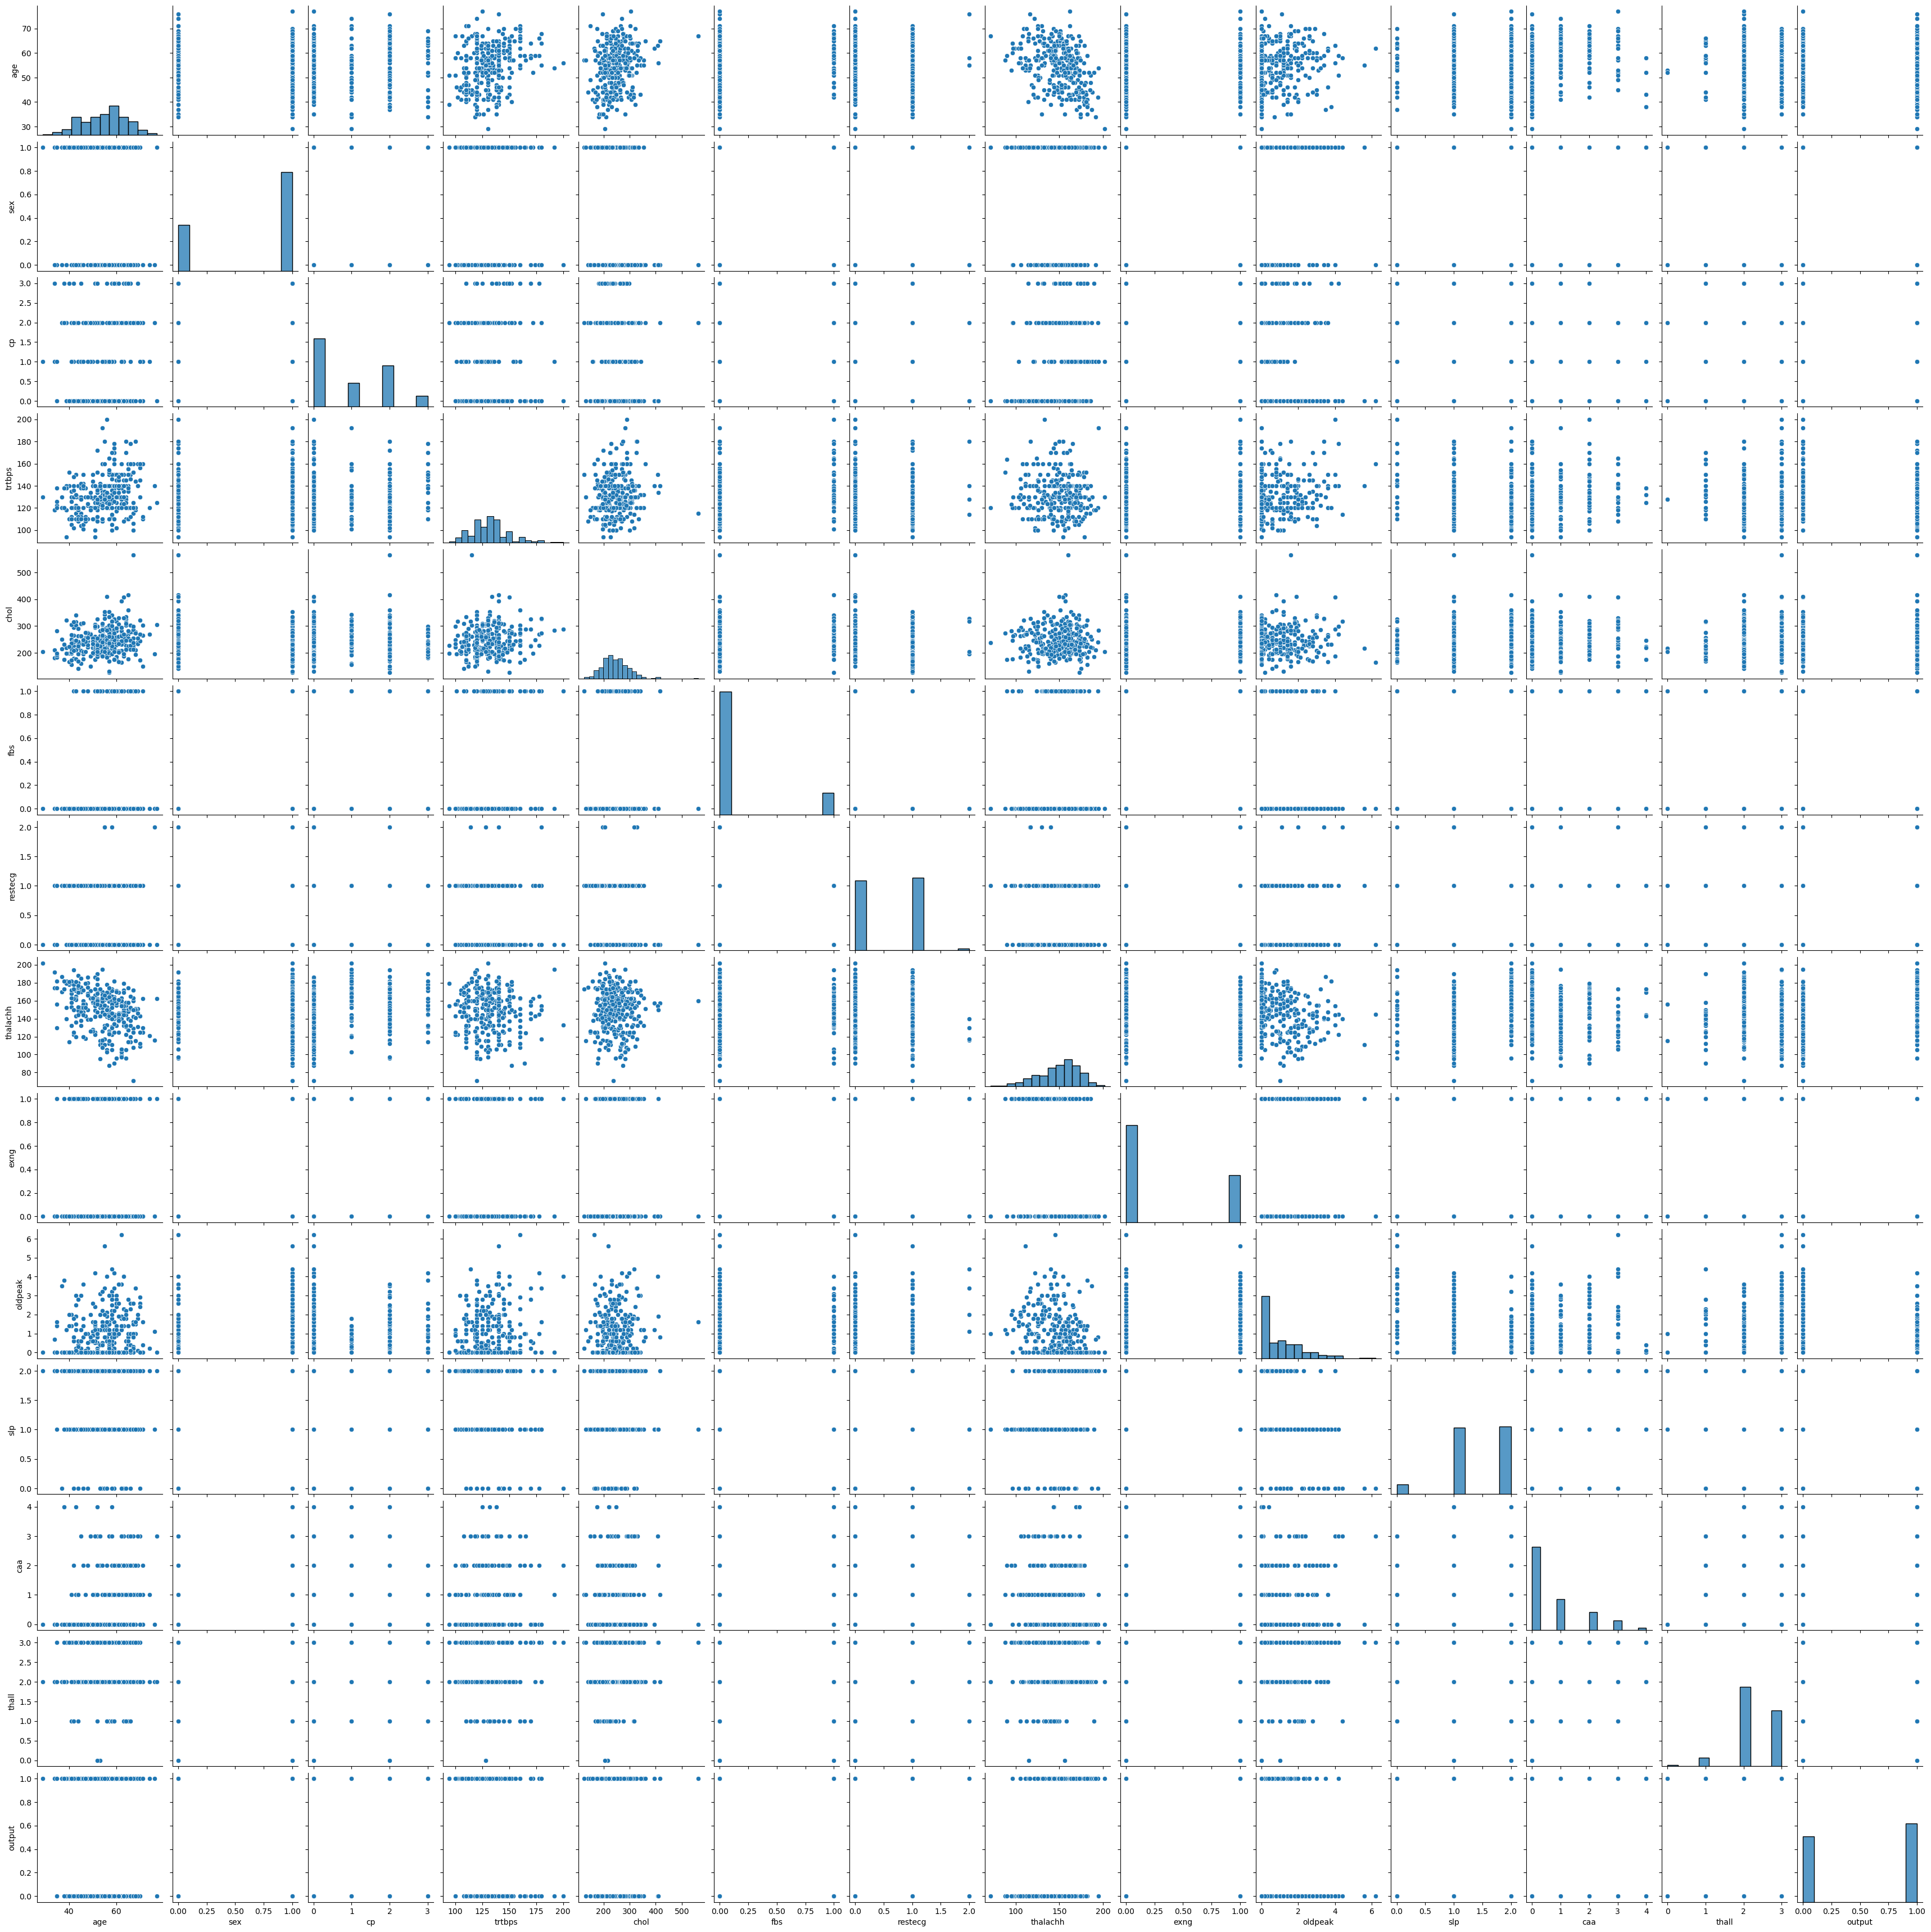

In [25]:
sns.pairplot(df)


<Axes: xlabel='age', ylabel='trtbps'>

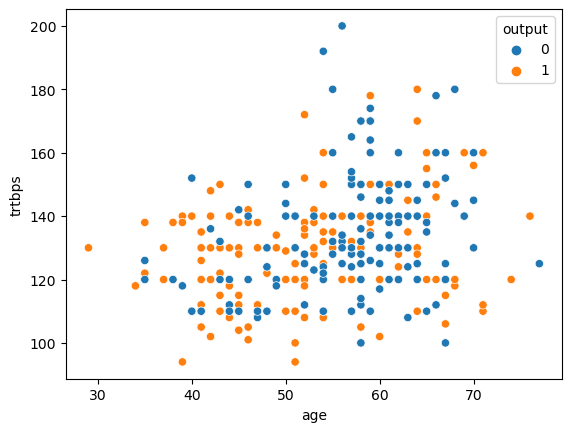

In [28]:
sns.scatterplot(x='age', y='trtbps', data=df, hue='output')


<Axes: xlabel='age', ylabel='chol'>

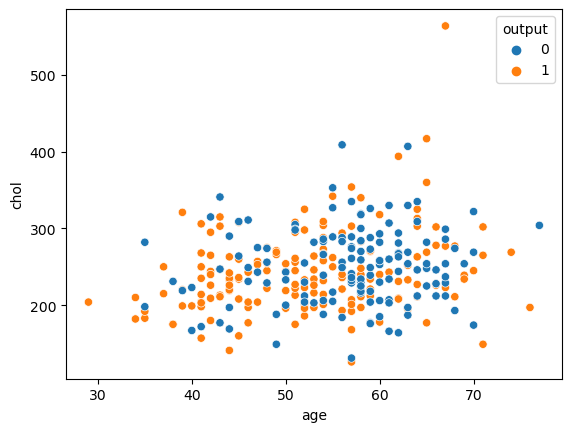

In [29]:
sns.scatterplot(x='age', y='chol', data=df, hue='output')


<Axes: xlabel='age', ylabel='thalachh'>

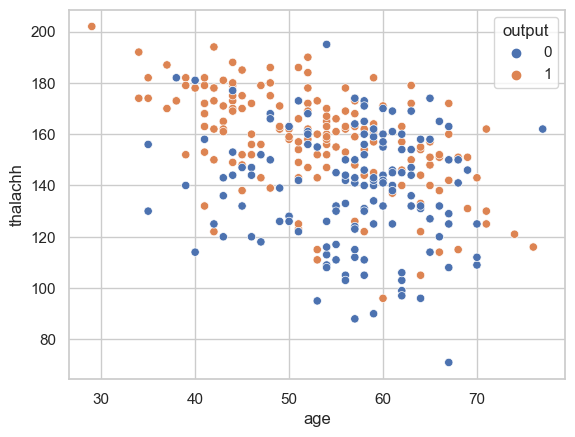

In [83]:
sns.scatterplot(x='age', y='thalachh', data=df, hue='output')


<Axes: xlabel='age', ylabel='oldpeak'>

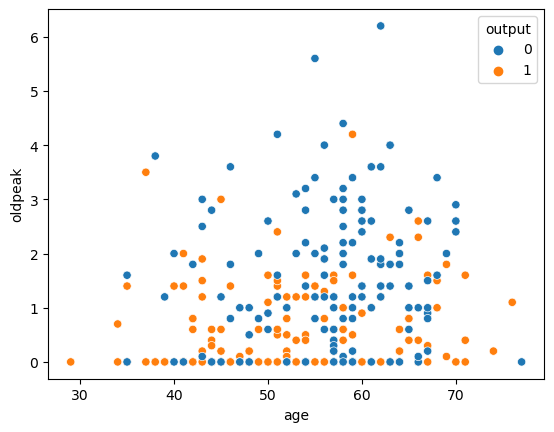

In [31]:
sns.scatterplot(x='age', y='oldpeak', data=df, hue='output')


Axes(0.1275,0.11;0.77x0.77)


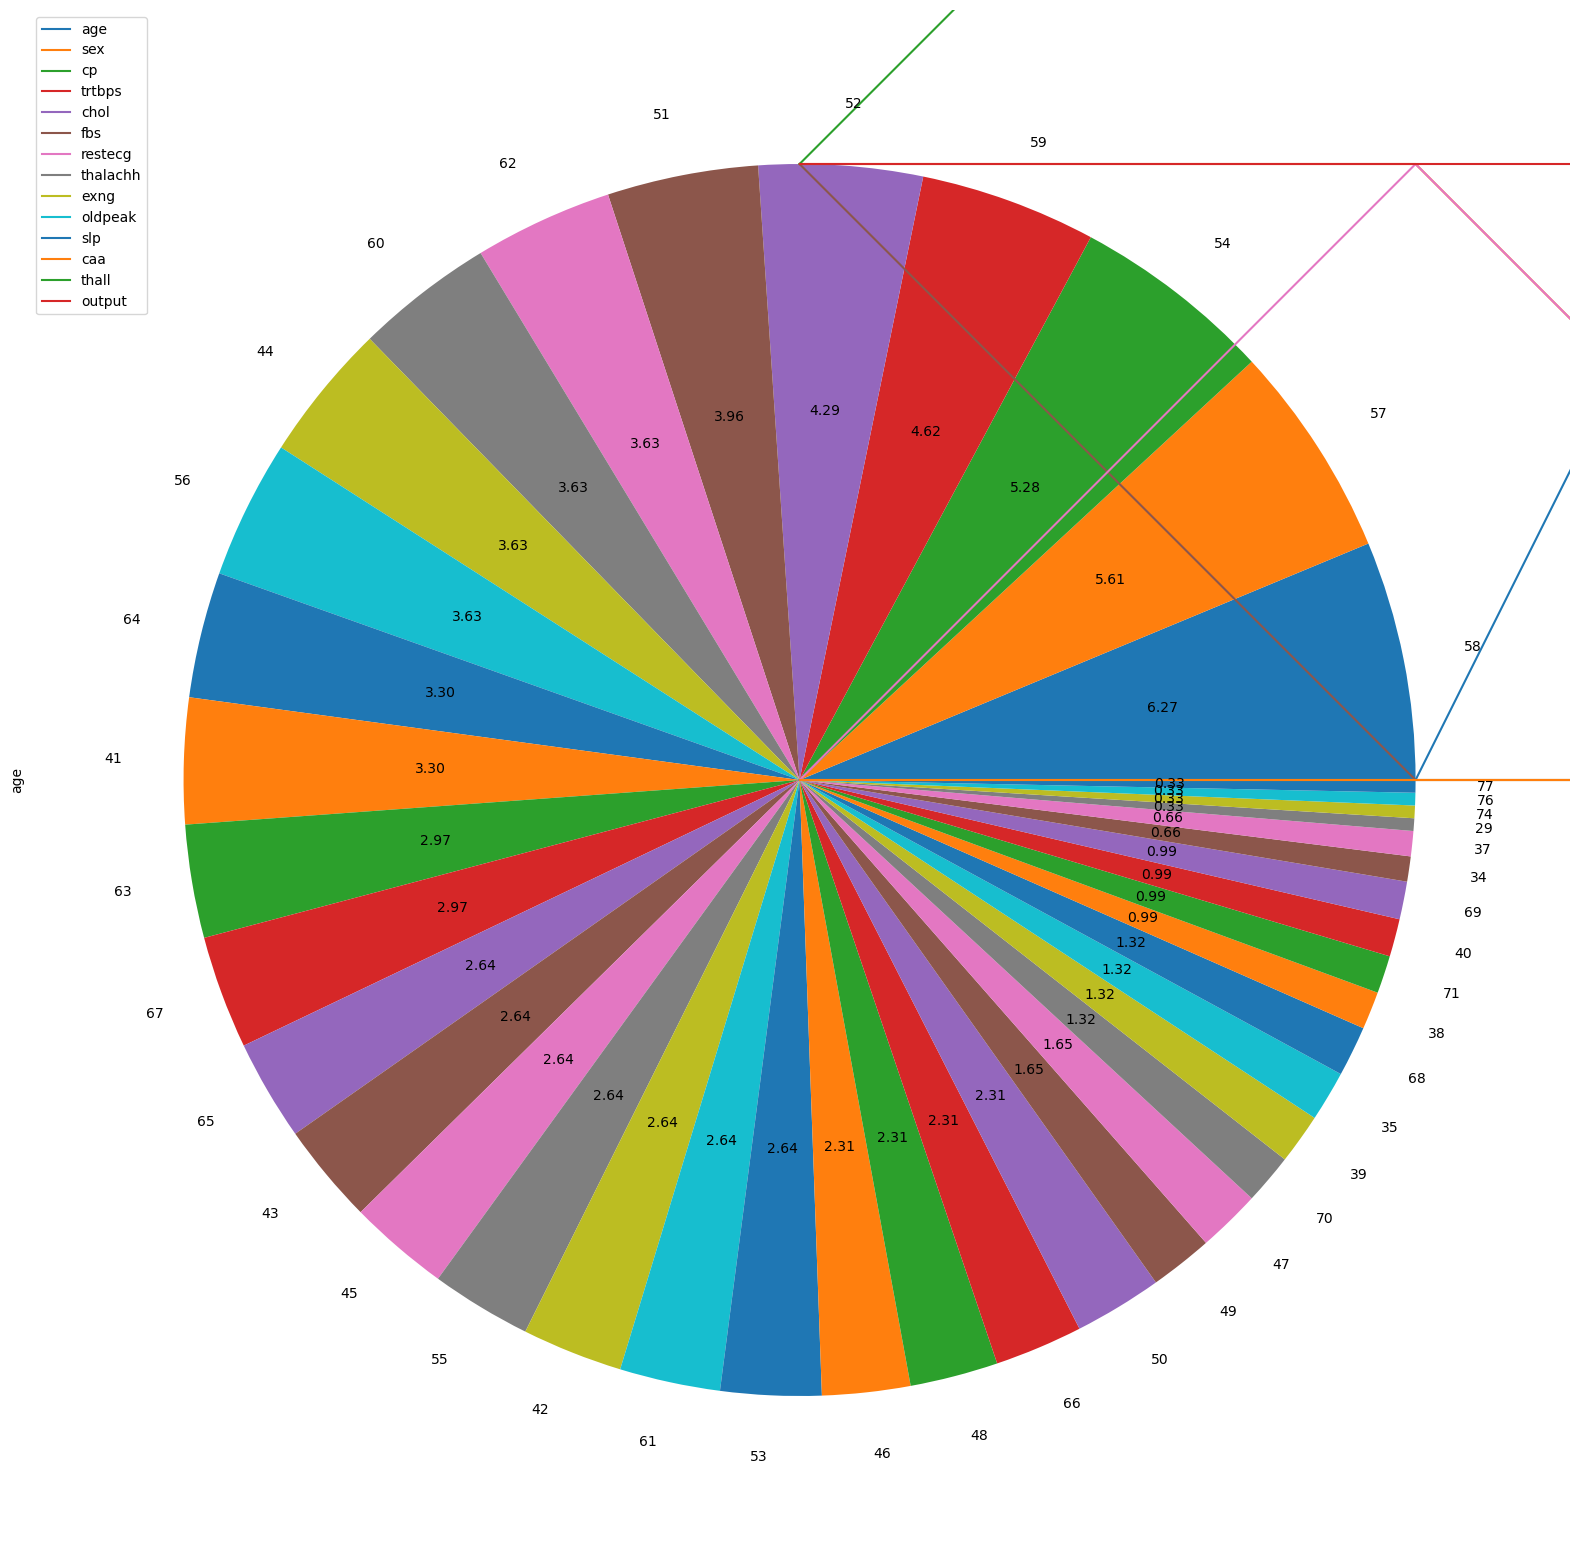

In [32]:
df.plot(figsize=(20,20))
print(df['age'].value_counts().plot(kind='pie',autopct='%.2f'))


Axes(0.1275,0.11;0.77x0.77)


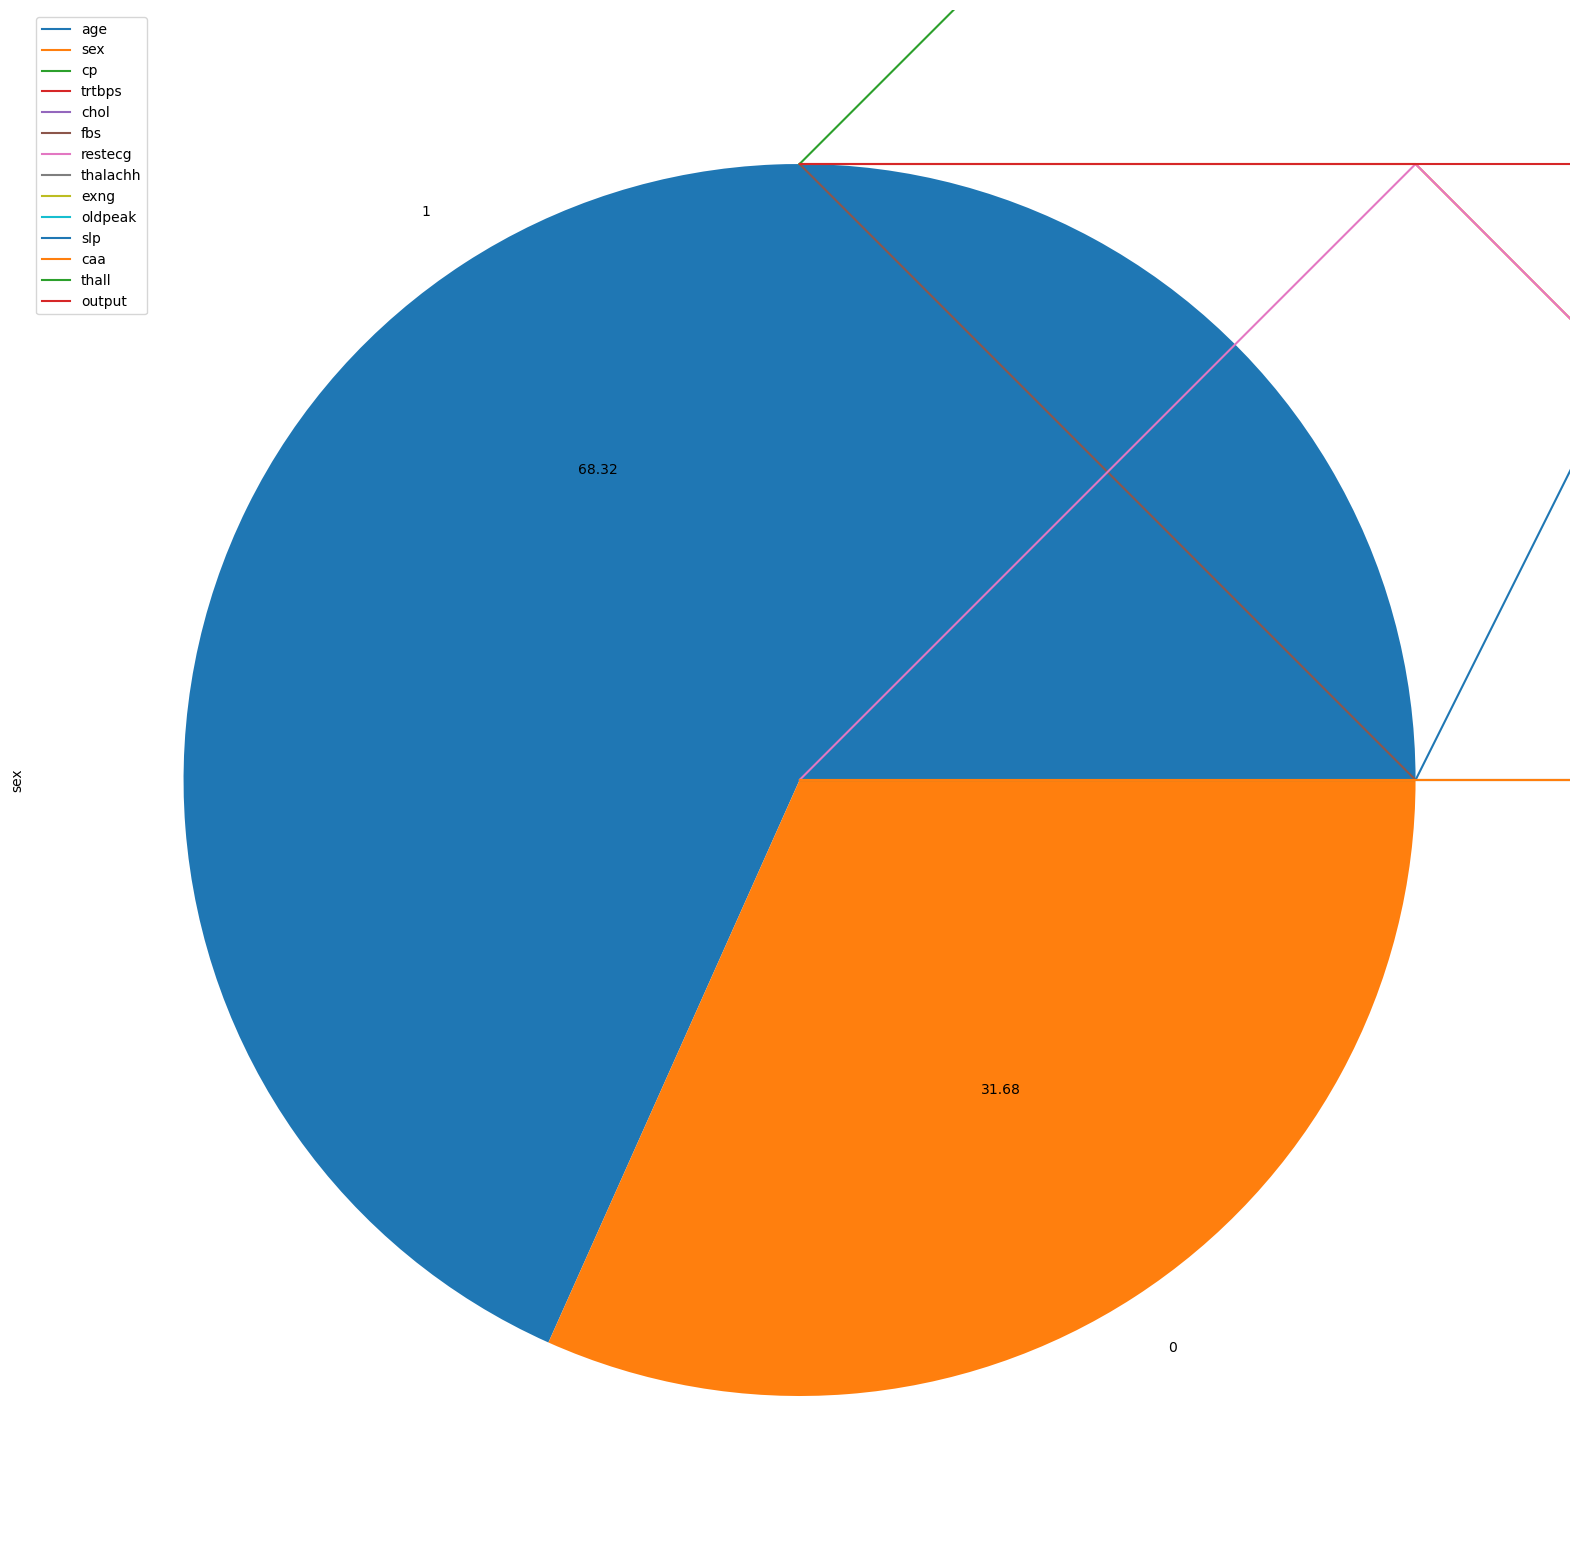

In [33]:
df.plot(figsize=(20,20))
print(df['sex'].value_counts().plot(kind='pie',autopct='%.2f'))

### Splitting Data


In [97]:
data = ['age' , 'sex' , 'cp',  'trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']

x= df[data]

y= df['output']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train, x_test , y_train , y_test = train_test_split ( x, y, test_size=0.2)
x_train.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [36]:
print('Shape for training data', x_train.shape, y_train.shape)
print("_________________________________")
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (242, 13) (242,)
_________________________________
Shape for testing data (61, 13) (61,)
